# Leveraging Knowledge Graph to support Machine Learning Model to optimize Supply Chain Management (Working title)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
original_data = pd.read_csv(
    "C:/Users/BriGHt/Msc Data Sciences AI and Digital Business/M599/Dataset/DataCoSupplyChain/DataCoSupplyChainDataset.csv",
    encoding='ISO-8859-1')

# Data Exploration

In [3]:
pd.set_option('display.max_columns', None)
display(original_data.head(10))
print("Number of rows of the dataframe: ", original_data.shape[0])
print("Number of columns of the dataframe: ", original_data.shape[1])

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,EE. UU.,XXXXXXXXX,Kimberly,19488,Flowers,XXXXXXXXX,Consumer,NY,2122 Hazy Corner,14150.0,2,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,19488,1/13/2018 11:03,75935,1360,32.779999,0.10,179250,327.75,0.06,1,327.75,294.980011,18.580000,Oceania,Queensland,CANCELED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Constance,19487,Terrell,XXXXXXXXX,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,19487,1/13/2018 10:42,75934,1360,39.330002,0.12,179249,327.75,

Number of rows of the dataframe:  180519
Number of columns of the dataframe:  53


In [4]:
original_data.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [5]:
original_data.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [6]:
original_data["Delivery Status"].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [7]:
original_data["Market"].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [8]:
original_data["Department Name"].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [9]:
original_data["Shipping Mode"].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

In [10]:
original_data["Order Region"].unique()

array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

## Delivery Status

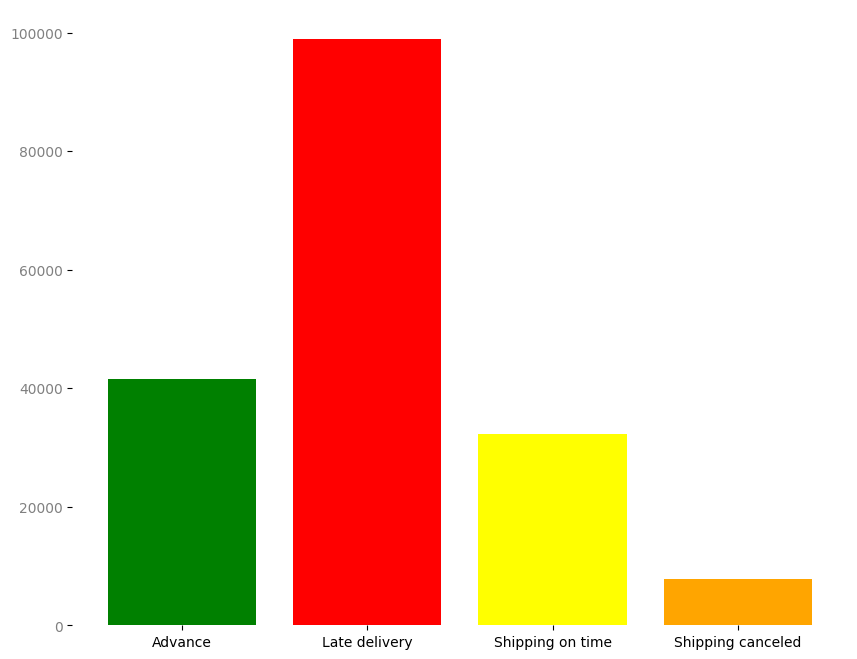

In [12]:
delivery_result_distribution = {'Delivery Status': ['Advance', 'Late delivery', 'Shipping on time', 'Shipping canceled'],
        'Count': [ len(original_data[original_data['Delivery Status'] == 'Advance shipping']) , 
                  len(original_data[original_data['Delivery Status'] == 'Late delivery']),
                  len(original_data[original_data['Delivery Status'] == 'Shipping on time']),
                  len(original_data[original_data['Delivery Status'] == 'Shipping canceled'])]}

df_result_count = pd.DataFrame(delivery_result_distribution, columns=['Delivery Status', 'Count'])


fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(df_result_count["Delivery Status"], df_result_count["Count"], color=["green", "red", "yellow", "orange"])

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.yticks(color="grey")
plt.show()

## Late Delivery Risk

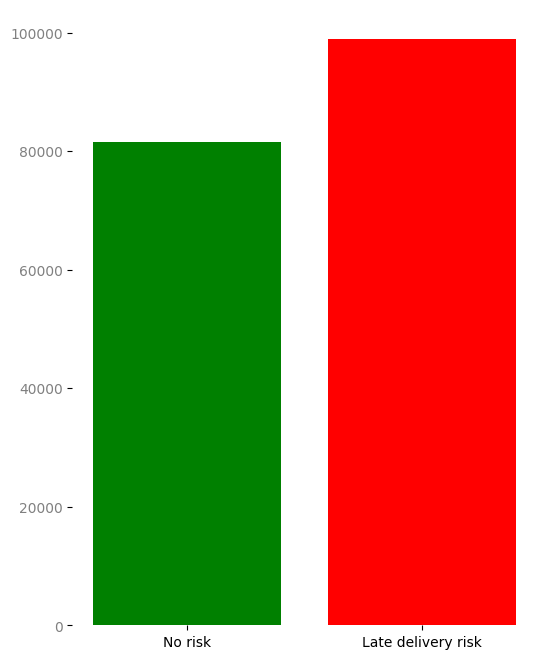

In [13]:
delay_distribution = {'Delay?': ['No risk', 'Late delivery risk'],
        'Count': [ len(original_data[original_data['Late_delivery_risk'] == 0]) , 
                  len(original_data[original_data['Late_delivery_risk'] == 1])]}

df_late_count = pd.DataFrame(delay_distribution, columns=['Delay?', 'Count'])

fig2, ax2 = plt.subplots(figsize=(6, 8))
plt.bar(df_late_count["Delay?"], df_late_count["Count"], color=["green", "red"])

ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.yticks(color="grey")


plt.show()

## Market

In [14]:
market_distribution = {'Market': ['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'],
        'Count': [ len(original_data[original_data['Market'] == 'Pacific Asia']) , 
                  len(original_data[original_data['Market'] == 'USCA']),
                  len(original_data[original_data['Market'] == 'Africa']),
                  len(original_data[original_data['Market'] == 'Europe']),
                  len(original_data[original_data['Market'] == 'LATAM'])]}

df_market_sum = pd.DataFrame(market_distribution, columns=['Market', 'Count'])
                      
df_market_sum

,Market,Count
0,Pacific Asia,41260
1,USCA,25799
2,Africa,11614
3,Europe,50252
4,LATAM,51594


<Axes: ylabel='count'>

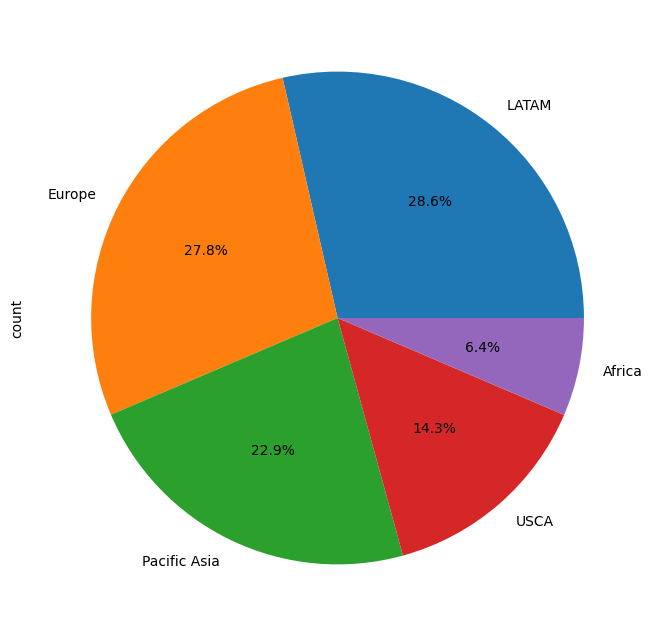

In [15]:
original_data["Market"].value_counts(dropna=False).plot(kind="pie", legend=False, figsize=(8,8), autopct='%1.1f%%')

## Department

In [16]:
df_dep = original_data[["Department Name"]].copy()
df_dep["Amount"] = 1
df_dep_summary = df_dep.groupby("Department Name").sum()
df_dep_summary["Department Name"] = df_dep_summary.index
df_dep_summary = df_dep_summary.sort_values('Amount', ascending=True)
df_dep_summary

,Amount,Department Name
Department Name,,
Health and Beauty,362,Health and Beauty
Book Shop,405,Book Shop
Pet Shop,492,Pet Shop
Technology,1465,Technology
Discs Shop,2026,Discs Shop
Fitness,2479,Fitness
Outdoors,9686,Outdoors
Footwear,14525,Footwear
Golf,33220,Golf


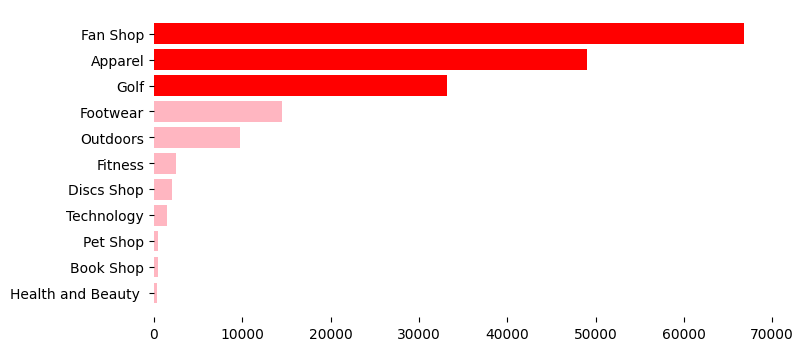

In [17]:
plt.figure(figsize=(8, 4))
plt.barh(df_dep_summary["Department Name"], df_dep_summary["Amount"], color=['lightpink', 'lightpink', 'lightpink', 'lightpink', 
                                                                'lightpink', 'lightpink', 'lightpink', 'lightpink',
                                                                       'red', 'red', 'red'])

ax3 = plt.gca()
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)

## Shipping Mode

In [18]:
df_shipping = original_data[["Shipping Mode", "Late_delivery_risk"]].copy()

df_shipping_ontime = df_shipping[df_shipping["Late_delivery_risk"] == 0][["Shipping Mode"]]
df_shipping_ontime["Amount"] = 1
df_shipping_ontime_summary = df_shipping_ontime.groupby("Shipping Mode").sum()
df_shipping_ontime_summary["Shipping Mode"] = df_shipping_ontime_summary.index
#df_shipping_ontime_summary = df_shipping_ontime_summary.sort_values('Shipping Mode', ascending=False)
df_shipping_ontime_summary

,Amount,Shipping Mode
Shipping Mode,,
First Class,1301,First Class
Same Day,5283,Same Day
Second Class,8229,Second Class
Standard Class,66729,Standard Class


In [19]:
df_shipping_late = df_shipping[df_shipping["Late_delivery_risk"] == 1][["Shipping Mode"]]
df_shipping_late["Amount"] = 1
df_shipping_late_summary = df_shipping_late.groupby("Shipping Mode").sum()
df_shipping_late_summary["Shipping Mode"] = df_shipping_late_summary.index
#df_shipping_late_summary = df_shipping_late_summary.sort_values('Amount', ascending=False)
df_shipping_late_summary

,Amount,Shipping Mode
Shipping Mode,,
First Class,26513,First Class
Same Day,4454,Same Day
Second Class,26987,Second Class
Standard Class,41023,Standard Class


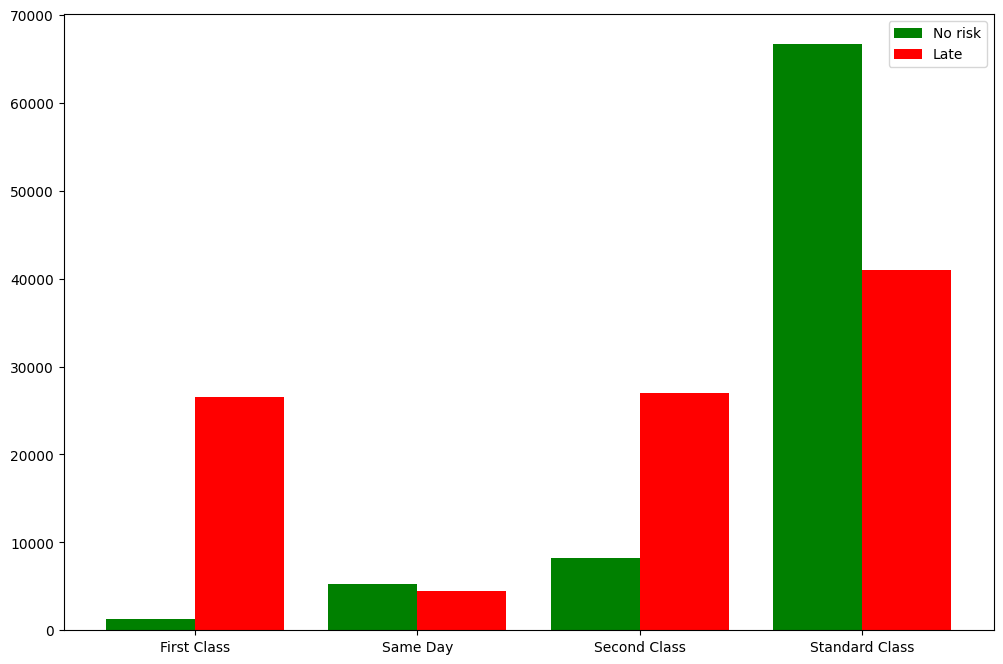

In [20]:
X = df_shipping_ontime_summary["Shipping Mode"]
X_axis = np.arange(len(X))

fig4, ax4 = plt.subplots(figsize=(12, 8))

plt.bar(X_axis - 0.2, df_shipping_ontime_summary["Amount"], 0.4, label = 'No risk', color="green") 
plt.bar(X_axis + 0.2, df_shipping_late_summary["Amount"], 0.4, label = 'Late', color="red") 
  
plt.xticks(X_axis, X) 
#plt.xlabel("Category", fontsize=12, weight='bold') 
#plt.ylabel("Vaues in US dollar", fontsize=15, weight='bold') 
#plt.title("Distribution of shipping by Shipping Mode", fontsize=15, weight='bold')
plt.legend() 
plt.show() 

## Order Region

In [21]:
df_order_region = original_data[["Order Region", "Late_delivery_risk"]].copy()

df_order_region_ontime = df_order_region[df_order_region["Late_delivery_risk"] == 0][["Order Region"]]
df_order_region_ontime["Amount"] = 1
df_order_region_ontime_summary = df_order_region_ontime.groupby("Order Region").sum()
df_order_region_ontime_summary["Order Region"] = df_order_region_ontime_summary.index
#df_order_region_ontime_summary = df_order_region_ontime_summary.sort_values('Amount', ascending=True)
df_order_region_ontime_summary

,Amount,Order Region
Order Region,,
Canada,491,Canada
Caribbean,3903,Caribbean
Central Africa,705,Central Africa
Central America,12823,Central America
Central Asia,247,Central Asia
East Africa,816,East Africa
East of USA,3066,East of USA
Eastern Asia,3325,Eastern Asia
Eastern Europe,1738,Eastern Europe


In [22]:
df_order_region_late = df_order_region[df_order_region["Late_delivery_risk"] == 1][["Order Region"]]
df_order_region_late["Amount"] = 1
df_order_region_late_summary = df_order_region_late.groupby("Order Region").sum()
df_order_region_late_summary["Order Region"] = df_order_region_late_summary.index
#df_order_region_late_summary = df_order_region_late_summary.sort_values('Amount', ascending=True)
df_order_region_late_summary

,Amount,Order Region
Order Region,,
Canada,468,Canada
Caribbean,4415,Caribbean
Central Africa,972,Central Africa
Central America,15518,Central America
Central Asia,306,Central Asia
East Africa,1036,East Africa
East of USA,3849,East of USA
Eastern Asia,3955,Eastern Asia
Eastern Europe,2182,Eastern Europe


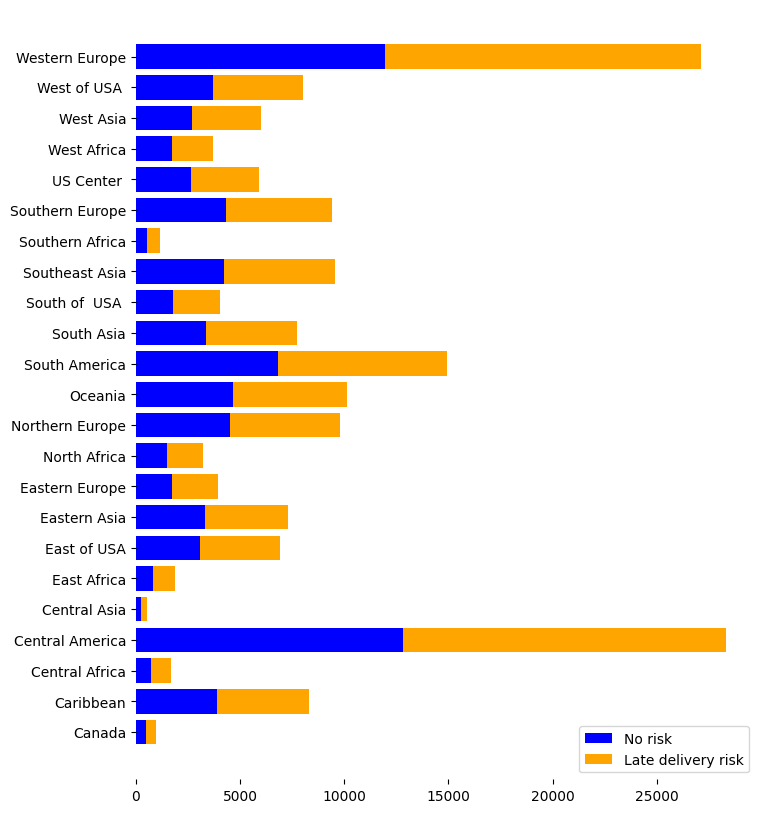

In [23]:
plt.figure(figsize=(8, 10))
plt.barh(df_order_region_ontime_summary["Order Region"], df_order_region_ontime_summary["Amount"], color="blue",
        label="No risk")
plt.barh(df_order_region_late_summary["Order Region"], 
         df_order_region_late_summary["Amount"], left = df_order_region_ontime_summary["Amount"], color="orange", label="Late delivery risk")

#plt.title("Distribution of shipping by order region")
ax5 = plt.gca()
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.legend()